# Abstract
The following document explores Anscombe's Quartet by visualing it using scatter plot and completing calculations to show visual difference and algebraic similarities between the datasets. The visualisation goes to show the importance of visualising datasets to accurately assess data.

# Graphing

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import pandas as pd
import plotly.express as px

In [4]:
anscombe_csv = pd.read_csv("Anscombe.csv")


anscombe = anscombe_csv.melt(
    id_vars=["x123","x4"], 
    value_vars=["y1","y2","y3","y4"],
    var_name="dataset",
    value_name="y"
)
anscombe["dataset"] = anscombe["dataset"].replace({
    "y1": "I",
    "y2": "II",
    "y3": "III",
    "y4": "IV"
})

anscombe["x"] = anscombe.apply(lambda row: row["x123"] if row["dataset"] in ["I","II","III"] else row["x4"], axis=1)

anscombe = anscombe.drop(columns=["x123","x4"])


Text(0.5, 1.03, "Relationship of x and y values in Anscombe's quartet")

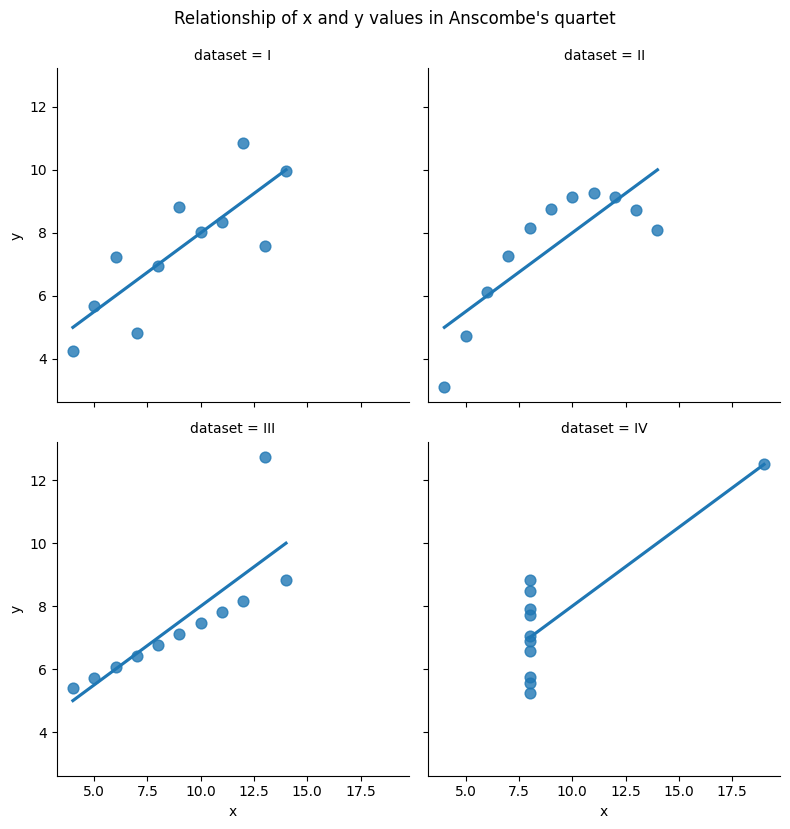

In [5]:
g_scatter = sns.lmplot(
    data=anscombe,
    x="x", 
    y="y", 
    col="dataset",
    col_wrap=2,
    ci=None,
    palette="muted",
    height=4,
    scatter_kws={"s": 60, "alpha": 0.8}
)
g_scatter.fig.suptitle("Relationship of x and y values in Anscombe's quartet", y=1.03)

## Scatter Plots

These plots show each dataset individually. It has no grid and uses a shared axis to reduce clutter. Each line has a different fit. Pearson correlation for Dataset 1 suggests a medium-positive correlation. Pearson correlation for Dataset 2 suggests no correlation. Pearson correlation for Dataset 3 suggests strong positive correlation with one outlier. Pearson correlation for Dataset 4 suggests no correlation.

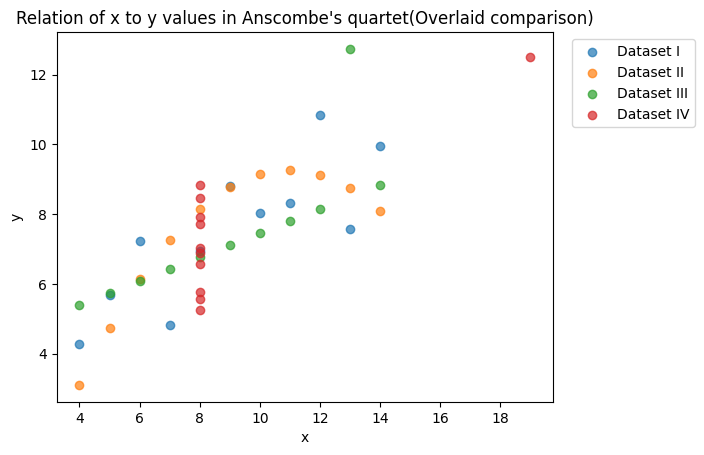

In [6]:
for label, group_data in anscombe.groupby("dataset"):
    plt.scatter(group_data["x"], group_data["y"], label=f"Dataset {label}", alpha=0.7) #assigning a different colour for each dataset
plt.xlabel("x")
plt.ylabel("y")
plt.title("Relation of x to y values in Anscombe's quartet(Overlaid comparison)")
plt.legend(loc=1, bbox_to_anchor=(1.3, 1)) #1 is upper right in matplotlib
plt.show()

## Overlaid Comparison plot

This plot is an overlaid comparison plot which has all datasets on it together. It shows just how different each dataset is.

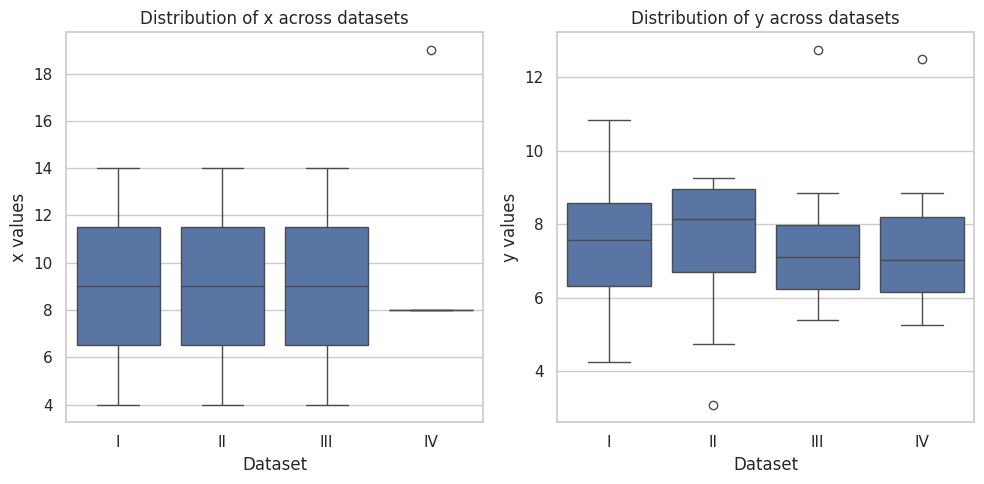

In [20]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=anscombe, x="dataset", y="x", legend=False, ax=axes[0])
axes[0].set_title("Distribution of x across datasets")
axes[0].set_xlabel("Dataset")
axes[0].set_ylabel("x values")

sns.boxplot(data=anscombe, x="dataset", y="y", legend=False, ax=axes[1])
axes[1].set_title("Distribution of y across datasets")
axes[1].set_xlabel("Dataset")
axes[1].set_ylabel("y values")

plt.tight_layout()
plt.show()


## Box Plot

These graphs shows the variance of x for each dataset and the variance of y for each dataset.

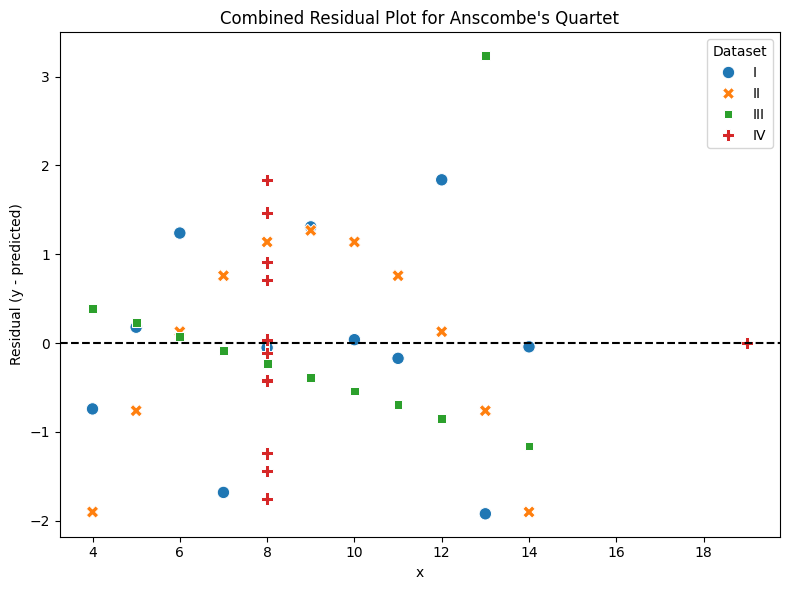

In [8]:
datasets = ['I', 'II', 'III', 'IV']

# Create a list to collect residual data
residual_data = []

# Loop through each dataset
for dataset in datasets:
    subset = anscombe[anscombe['dataset'] == dataset]
    x = subset['x']
    y = subset['y']

    coeffs = np.polyfit(x, y, 1)
    y_pred = np.polyval(coeffs, x)

    residuals = y - y_pred

    residual_data.append(pd.DataFrame({
        'x': x,
        'residual': residuals,
        'dataset': dataset
    }))

residuals_anscombe = pd.concat(residual_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=residuals_anscombe, x='x', y='residual', hue='dataset', style='dataset', s=80)

plt.axhline(0, color='black', linestyle='--')

plt.title("Combined Residual Plot for Anscombe's Quartet")
plt.xlabel("x")
plt.ylabel("Residual (y - predicted)")
plt.legend(title="Dataset")
plt.grid(False)
plt.tight_layout()
plt.show()

## Residual Plot

This graph shows the difference of points from the linear regression line at any given x-value, for all 4 datasets. In 3 of 4 datasets, there is no bell curve shape as you can see each dataset has differing residual distribution. The only one of which that has a bell curve distribution is Dataset 3 as it follows a linear distribution which creates a bell curve.

In [9]:
fig = px.scatter(
    anscombe,
    x='x', y='y',
    color='dataset',
    facet_col='dataset',
    title="Interactive Anscombe scatter (Plotly)"
)
fig.update_layout(height=400, width=1000)

new_titles = {"I": "Dataset I", "II": "Dataset II", "III": "Dataset III", "IV": "Dataset IV"}
fig.for_each_annotation(lambda a: a.update(text=new_titles[a.text.split("=")[-1].strip()]))

fig.show()
fig.write_html("anscombe_plotly.html")

## Interactive Scatter Plot

This graph will not be visible on the pdf, please view through the external method available

# Calculations

In [10]:
x_all = anscombe["x"].to_numpy()
mean_x = np.mean(x_all)
print("Mean of x is",mean_x)
var_x = round(np.var(x_all),0)
print("Variance of x is",var_x)

Mean of x is 9.0
Variance of x is 10.0


Analysis equations and formulas for x is here. It shows mean and variance.

The mean of x is represented by:

$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$(Sum of x devided by # of x values)

The variance of x is represented by:

$s_x^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}$

In [11]:
y_all = anscombe["y"].to_numpy()
mean_y = round(np.mean(y_all),2)
print("Mean of y is",mean_y)

y1 = anscombe.loc[anscombe["dataset"] == "I", "y"].to_numpy() # Seperating values in the dataset to different variables
var_y1 = round(np.var(y1),3)
print("Variance of y(Dataset 1) is",var_y1)

y2 = anscombe.loc[anscombe["dataset"] == "II", "y"].to_numpy()
var_y2 = round(np.var(y2),3)
print("Variance of y(Dataset 2) is",var_y2)

y3 = anscombe.loc[anscombe["dataset"] == "III", "y"].to_numpy()
var_y3 = round(np.var(y3),3)
print("Variance of y(Dataset 3) is",var_y3)

y4 = anscombe.loc[anscombe["dataset"] == "IV", "y"].to_numpy()
var_y4 = round(np.var(y4),3)
print("Variance of y(Dataset 4) is",var_y4)

stdev_y1 = round(np.std(y1),3) # std is standard deviation using numpy
print("Standard deviation of y(Dataset 1) is",stdev_y1)

stdev_y2 = round(np.std(y2),3)
print("Standard deviation of y(Dataset 2) is",stdev_y2)

stdev_y3 = round(np.std(y3),3)
print("Standard deviation of y(Dataset 3) is",stdev_y3)

stdev_y4 = round(np.std(y4),3)
print("Standard deviation of y(Dataset 4) is",stdev_y4)

Mean of y is 7.5
Variance of y(Dataset 1) is 3.752
Variance of y(Dataset 2) is 3.752
Variance of y(Dataset 3) is 3.748
Variance of y(Dataset 4) is 3.748
Standard deviation of y(Dataset 1) is 1.937
Standard deviation of y(Dataset 2) is 1.937
Standard deviation of y(Dataset 3) is 1.936
Standard deviation of y(Dataset 4) is 1.936


These are all the calculations and analysis formulas for y. It includes the mean, variance and standard deviation and shows just how similar they are.

To calculate mean, the equation used here is 

$\bar{y} = \frac{\sum_{i=1}^{n} y_i}{n}$(Sum of all y values divided by the # of y values)

Variance is represented by:

$s_y^2 = \frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{n - 1}$

Standard deviation is represented by:

$s_y = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{n - 1}}$

In [12]:
def r_squared(x, y): # Creating a function to compute R^2 for the datasets
    m, b = np.polyfit(x, y, 1)
    y_pred = m * x + b
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

x1 = anscombe.loc[anscombe["dataset"] == "I", "x"].to_numpy() # Setting variables for each x value in anscombe
x2 = anscombe.loc[anscombe["dataset"] == "II", "x"].to_numpy()
x3 = anscombe.loc[anscombe["dataset"] == "III", "x"].to_numpy()
x4 = anscombe.loc[anscombe["dataset"] == "IV", "x"].to_numpy()
r2_1 = round(r_squared(x1, y1),4)
r2_2 = round(r_squared(x2, y2),4)
r2_3 = round(r_squared(x3, y3),4)
r2_4 = round(r_squared(x4, y4),4)

print("R² for Dataset I is", r2_1)
print("R² for Dataset II is", r2_2)
print("R² for Dataset III is", r2_3)
print("R² for Dataset IV is", r2_4)

R² for Dataset I is 0.6665
R² for Dataset II is 0.6662
R² for Dataset III is 0.6663
R² for Dataset IV is 0.6667


Above is the coefficient of determination for each dataset.

To calculate it, the equation used is as follows:

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

where SS$_{res}$ is equal to:

$\sum (y_i - \hat{y}_i)^2$(the residual sum of squares i.e. how far the predictions are from the actual data)

and SS$_{tot}$ is equal to:

$\sum (y_i - \bar{y})^2$(the total sum of squares i.e. how far the data points are from their mean)

# Conclusions

Overall, the datasets look very different visually, but have very similar calculations. This shows how important it is to visualize datasets differently to get a full picture.